<a href="https://colab.research.google.com/github/vineeth2707/forever/blob/main/Copy_of_P1_starter_CAP6619_Summer2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAP 6619 - Deep Learning - Dr Marques
## Project 1
## Image Classifiers Using Neural Networks and the MNIST and Fashion MNIST Datasets

**Include your name here:** (Saivineeth Suram)

**Include 'shared link' to 'your' final version of this NB here:** (https://colab.research.google.com/drive/1wq5TezX0JFYJi0iANmyhOgM5_CI3nHzH?authuser=1#scrollTo=Whf_8TEO-6qX)

Useful references and sources:

**MNIST**

- https://www.tensorflow.org/datasets/catalog/mnist

- https://en.wikipedia.org/wiki/MNIST_database 

- https://github.com/the-deep-learners/deep-learning-illustrated/blob/master/notebooks/shallow_net_in_keras.ipynb 

**Fashion MNIST**

- https://www.tensorflow.org/datasets/catalog/fashion_mnist

- https://en.wikipedia.org/wiki/Fashion_MNIST

- https://keras.io/api/datasets/fashion_mnist/

## PART 1 - *MNIST classifier using MLP*




### Import Needed Resources / Libraries

In [1]:
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

from keras import layers

from matplotlib import pyplot as plt

import numpy as np
import tensorflow as tf

### Load and prepare the data

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and validation sets
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


### Examine Data

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

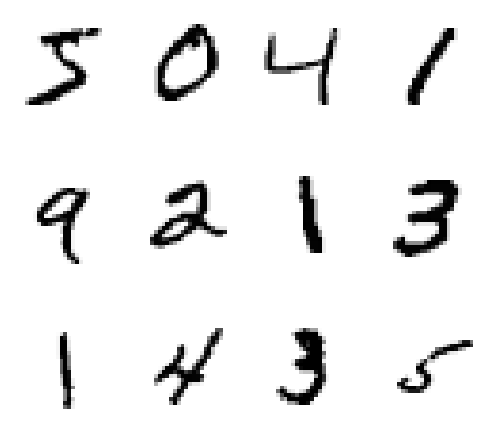

In [6]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [7]:
X_valid.shape

(10000, 28, 28)

In [8]:
y_valid.shape

(10000,)

In [9]:
y_valid[0]

7

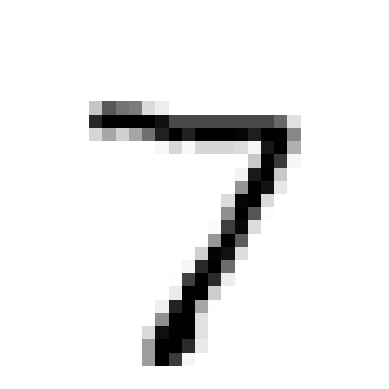

In [10]:
plt.imshow(X_valid[0], cmap='Greys')
plt.axis('off')
plt.show()

In [11]:
# Reshape (flatten) images 
X_train_reshaped = X_train.reshape(60000, 784).astype('float32')
X_valid_reshaped = X_valid.reshape(10000, 784).astype('float32')

# Scale images to the [0, 1] range
X_train_scaled_reshaped = X_train_reshaped / 255
X_valid_scaled_reshaped = X_valid_reshaped / 255

# Renaming for conciseness
X_training = X_train_scaled_reshaped
X_validation = X_valid_scaled_reshaped

print("X_training shape (after reshaping + scaling):", X_training.shape)
print(X_training.shape[0], "train samples")
print("X_validation shape (after reshaping + scaling):", X_validation.shape)
print(X_validation.shape[0], "validation samples")

X_training shape (after reshaping + scaling): (60000, 784)
60000 train samples
X_validation shape (after reshaping + scaling): (10000, 784)
10000 validation samples


In [12]:
# convert class vectors to binary class matrices
y_training = keras.utils.to_categorical(y_train, num_classes)
y_validation = keras.utils.to_categorical(y_valid, num_classes)

In [13]:
print(y_valid[0])
print(y_validation[0])

7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


### Configure model

In [14]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [16]:
(64*784)

50176

In [17]:
(64*784)+64

50240

In [18]:
(10*64)+10

650

In [19]:
model.compile(
    loss='mean_squared_error', 
    optimizer=SGD(learning_rate=0.01), 
    metrics=['accuracy']
)

### Train!

In [20]:
batch_size=128
epochs=200

history = model.fit(
  X_training, # training data
  y_training, # training targets
  epochs=epochs,
  batch_size=batch_size,
  verbose=1,
  validation_data=(X_validation, y_validation)
)

Epoch 1/200
469/469 [==============================] - 8s 7ms/step - loss: 0.0932 - accuracy: 0.1015 - val_loss: 0.0921 - val_accuracy: 0.1180
Epoch 2/200
469/469 [==============================] - 2s 5ms/step - loss: 0.0915 - accuracy: 0.1432 - val_loss: 0.0909 - val_accuracy: 0.1635
Epoch 3/200
469/469 [==============================] - 4s 8ms/step - loss: 0.0905 - accuracy: 0.1768 - val_loss: 0.0901 - val_accuracy: 0.1879
Epoch 4/200
469/469 [==============================] - 3s 7ms/step - loss: 0.0899 - accuracy: 0.1952 - val_loss: 0.0896 - val_accuracy: 0.2030
Epoch 5/200
469/469 [==============================] - 2s 3ms/step - loss: 0.0894 - accuracy: 0.2103 - val_loss: 0.0891 - val_accuracy: 0.2160
Epoch 6/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0890 - accuracy: 0.2245 - val_loss: 0.0888 - val_accuracy: 0.2337
Epoch 7/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0886 - accuracy: 0.2444 - val_loss: 0.0884 - val_accuracy: 0.2528

### Plot learning curves

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


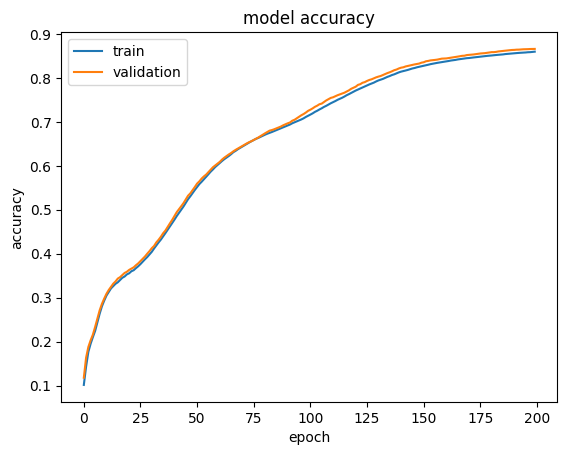

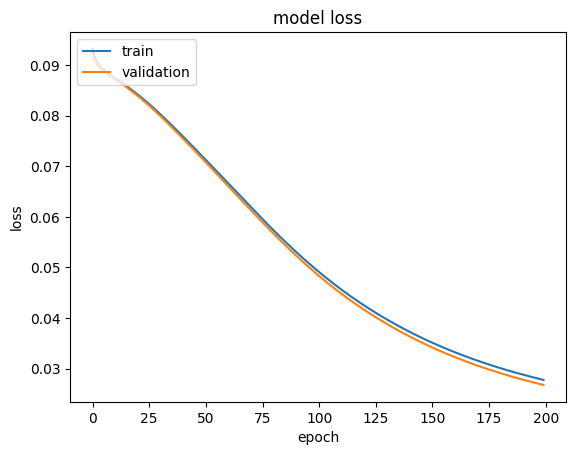

In [21]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Evaluate the model

In [22]:
model.evaluate(X_validation, y_validation)

313/313 [==============================] - 1s 2ms/step - loss: 0.0268 - accuracy: 0.8659


[0.026796728372573853, 0.8658999800682068]

## **PART 1** - *Your Turn* 

### **Part 1 - Tasks:**  *(40 pts)*
1. Write code to display the confusion matrix for your classifier and comment on the insights such confusion matrix provides. See [this](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html) for an example.

2. Write code to display 10 cases where the classifier makes mistakes. Make sure to display both the true value as well as the predicted value.

#### 1.a. Confusion Matrix *(10 pts)*

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 1.1952 - accuracy: 0.7214 - val_loss: 0.6415 - val_accuracy: 0.8554
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.5510 - accuracy: 0.8660 - val_loss: 0.4538 - val_accuracy: 0.8856
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.4378 - accuracy: 0.8855 - val_loss: 0.3883 - val_accuracy: 0.8991
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.3877 - accuracy: 0.8961 - val_loss: 0.3523 - val_accuracy: 0.9036
Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss: 0.3577 - accuracy: 0.9021 - val_loss: 0.3300 - val_accuracy: 0.9100
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3368 - accuracy: 0.9067 - val_loss: 0.3128 - val_accuracy: 0.9130
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3211 - accuracy: 0.9110 - val_loss: 0.2995 - val_accuracy: 0.9173
Epoch 

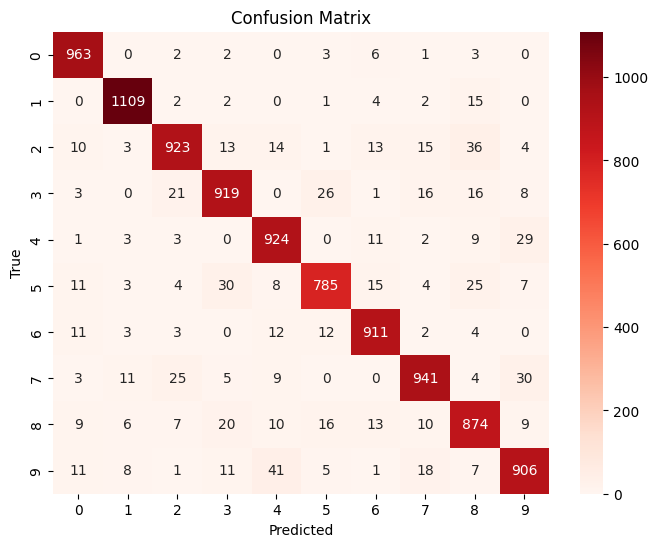

In [23]:
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import SGD
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

num_classes = 10
input_shape = (28, 28, 1)

(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

X_train = X_train.astype('float32') / 255.0
X_valid = X_valid.astype('float32') / 255.0

y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)

model = Sequential([
    Flatten(input_shape=input_shape),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_valid, y_valid))

y_pred = model.predict(X_valid)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_valid, axis=1)

cm = confusion_matrix(y_true_labels, y_pred_labels)

class_labels = [str(i) for i in range(num_classes)]

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

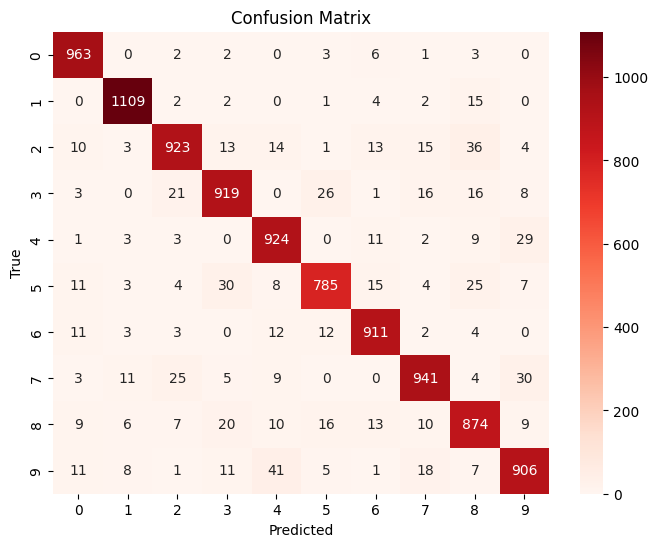

In [24]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true_labels, y_pred_labels)

class_labels = [str(i) for i in range(num_classes)]

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


#### 1.b. Comment on the insights confusion matrix provides *(10 pts)*

This confusion matrix provides valuable insights into the performance of the classifier. Some insight  derived from the confusion matrix:

Accuracy: The confusion matrix permits us to calculate the classifier's ordinary accuracy by summing up the values on the diagonal (true positives) and dividing it with the aid of the complete quantity of instances. It presents a measure of how nicely the mannequin is performing overall.

True Positives (TP) and True Negatives (TN): The diagonal values here signify the wide variety of cases that were successfully classified as acceptable (TP) and poor (TN). These values highlight the classifier's ability to identify instances of every class effectively.

False Positives (FP) and False Negatives (FN): The off-diagonal values in the confusion matrix characterize misclassifications. False positives manifest when the classifier predicts an excellent category when the proper type is negative. In contrast, false negatives occur when the classifier predicts a negative classification when the proper class is positive. These values supply insights into the precise kinds of blunders made through the classifier.

Class-specific Performance: The confusion matrix allows us to analyze the classifier's overall performance in each man or woman class. It helps them understand well-predicted instructions (high TP) and often misclassified training(high FP or FN). This insight can guide addition analysis and potential enhancements for particular classes.

Precision and Recall: Precision and recall can be calculated using the confusion matrix values. Precision is the ratio of TP to TP and FP, while recall is the ratio of TP to the sum of TP and FN. These metrics provide insights into the classifier's performance in correctly figuring out ideal situations (precision) and taking pictures of all mild cases.

By examining the confusion matrix, we can have a classifier. It helps perceive which classes are well-predicted and which ones require additional attention. These statistics can provide information enhancements in the model, such as adjusting the decision threshold, editing the training data, or focusing on specific classes that show off high error rates.

The insights derived from the confusion matrix must be considered alongside different contrast metrics and area understanding to make knowledgeable choices and upgrades in the classifier. 

#### 2.Display 10 cases where the classifier makes mistakes. *(20 pts)*

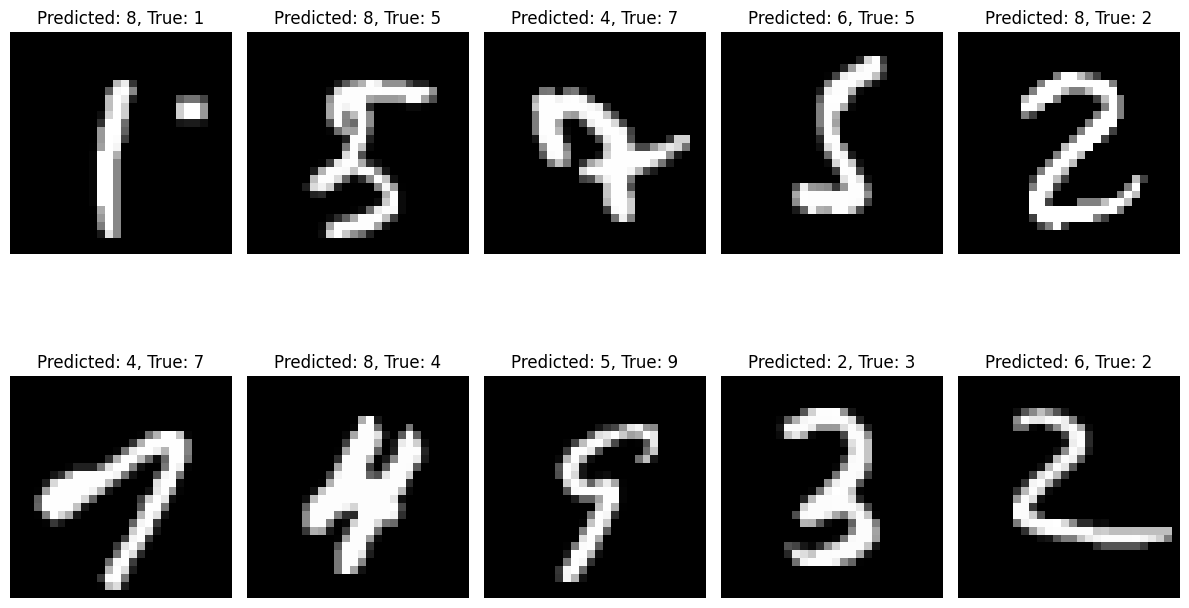

In [25]:
misclassified_indices = np.where(y_pred_labels != y_true_labels)[0]

random_misclassified_indices = np.random.choice(misclassified_indices, size=10, replace=False)

plt.figure(figsize=(12, 8))
for i, index in enumerate(random_misclassified_indices):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_valid[index], cmap='gray')
    plt.title(f"Predicted: {y_pred_labels[index]}, True: {y_true_labels[index]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


## PART 2 - *Fashion MNIST*




### Load and prepare the data

In [26]:
# Model / data parameters
num_classes = 10
input_shape = [28 ,28]

In [27]:
# Loading and Spliting Data in Test and Train 
(X_train, y_train), (X_valid, y_valid) = tf.keras.datasets.fashion_mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_valid.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_valid.shape == (10000,)

4422102/4422102 [==============================] - 0s 0us/step


### Defining Classes

In [28]:
classes_names = ['T-shirt/top' ,  'Trouser' ,'Pullover' , 'Dress', 'Coat','Sandal','Shirt','Sneaker', 'Bag','Ankle Boot'] 

### Examine Data

In [29]:
X_train.shape

(60000, 28, 28)

In [30]:
y_valid.shape

(10000,)

In [31]:
y_train[0:12]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9], dtype=uint8)

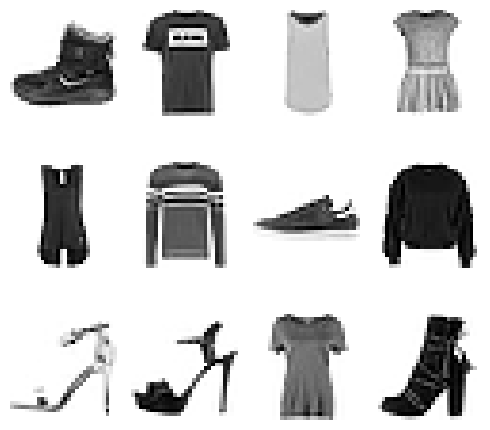

In [32]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [33]:
X_valid.shape

(10000, 28, 28)

In [34]:
y_valid.shape

(10000,)

In [35]:
y_valid[0]

9

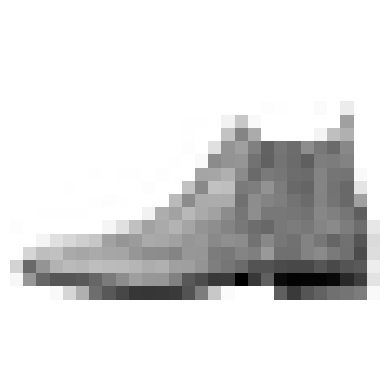

In [36]:
plt.imshow(X_valid[0], cmap='Greys')
plt.axis('off')
plt.show()

In [37]:
# Reshape (flatten) images 
X_train_reshaped = X_train.reshape(60000, 784).astype('float32')
X_valid_reshaped = X_valid.reshape(10000, 784).astype('float32')

# Scale images to the [0, 1] range
X_train_scaled_reshaped = X_train_reshaped / 255
X_valid_scaled_reshaped = X_valid_reshaped / 255

# Renaming for conciseness
X_training = X_train_scaled_reshaped
X_validation = X_valid_scaled_reshaped

print("X_training shape (after reshaping + scaling):", X_training.shape)
print(X_training.shape[0], "train samples")
print("X_validation shape (after reshaping + scaling):", X_validation.shape)
print(X_validation.shape[0], "validation samples")

X_training shape (after reshaping + scaling): (60000, 784)
60000 train samples
X_validation shape (after reshaping + scaling): (10000, 784)
10000 validation samples


In [38]:
# convert class vectors to binary class matrices
y_training = keras.utils.to_categorical(y_train, num_classes)
y_validation = keras.utils.to_categorical(y_valid, num_classes)

In [39]:
print(y_valid[0])
print(y_validation[0])

9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## **PART 2** - *Your Turn*

### **Part 2 - Tasks:** *(60 pts)*
Build a NN solution identical to the one before: *(20 pts)*
> a. Plot learning curves *(10 pts)*

> b. Display the confusion matrix for your classifier *(10 pts)*

> c. Evaluate the model, identify accuracy, etc. *(10 pts)*

> d. Discuss why the results are not as good. *(10 pts)*





#### NN solution *(20 pts)*

Configure the Model *(10 pts)*

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 1.1612 - accuracy: 0.7212 - val_loss: 0.6369 - val_accuracy: 0.8524
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.5504 - accuracy: 0.8639 - val_loss: 0.4534 - val_accuracy: 0.8813
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.4391 - accuracy: 0.8833 - val_loss: 0.3884 - val_accuracy: 0.8979
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3897 - accuracy: 0.8938 - val_loss: 0.3534 - val_accuracy: 0.9019
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3600 - accuracy: 0.9007 - val_loss: 0.3316 - val_accuracy: 0.9078
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3393 - accuracy: 0.9060 - val_loss: 0.3148 - val_accuracy: 0.9123
Epoch 7/10
469/469 [==============================] - 2s 3ms/step - loss: 0.3234 - accuracy: 0.9104 - val_loss: 0.3018 - val_accuracy: 0.9159
Epoch 

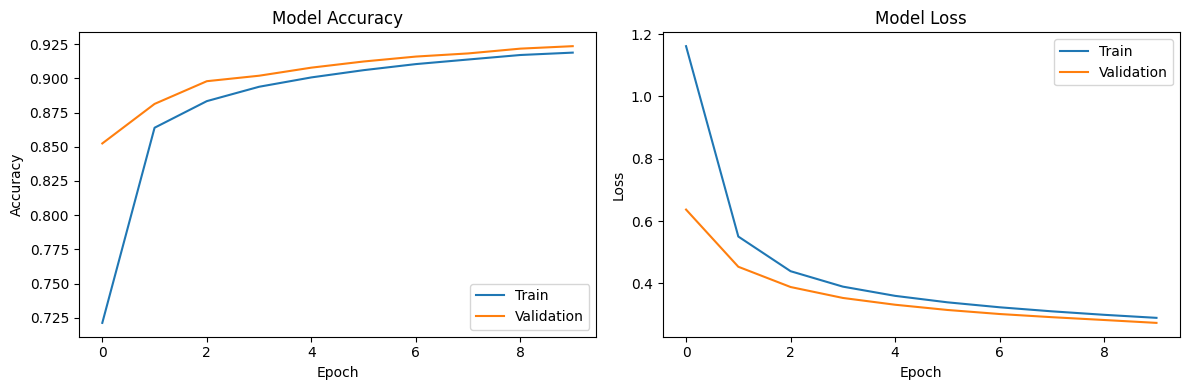

In [40]:
# Your Configure the Model code here and in additional code cells as needed
# use same model and hyperparameters as was used for MNIST above
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plt

num_classes = 10
input_shape = (28, 28, 1)

(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

X_train = X_train.astype('float32') / 255.0
X_valid = X_valid.astype('float32') / 255.0

y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)

model = Sequential([
    Flatten(input_shape=input_shape),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])
              
history = model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_valid, y_valid))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()


In [41]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import SGD

num_classes = 10
input_shape = (28, 28, 1)

model = Sequential([
    Flatten(input_shape=input_shape),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Train the Model  *(10 pts)*

In [42]:
# Your Train the Model code here and in additional code cells as needed
# same as was used in MNIST above
history = model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 1.1503 - accuracy: 0.7318 - val_loss: 0.6271 - val_accuracy: 0.8569
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.5443 - accuracy: 0.8662 - val_loss: 0.4480 - val_accuracy: 0.8861
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.4344 - accuracy: 0.8856 - val_loss: 0.3853 - val_accuracy: 0.8979
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3860 - accuracy: 0.8951 - val_loss: 0.3508 - val_accuracy: 0.9051
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3568 - accuracy: 0.9025 - val_loss: 0.3282 - val_accuracy: 0.9097
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.3362 - accuracy: 0.9067 - val_loss: 0.3129 - val_accuracy: 0.9147
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3205 - accuracy: 0.9104 - val_loss: 0.3005 - val_accuracy: 0.9181
Epoch 

#### Plot learning curves *(10 pts)*

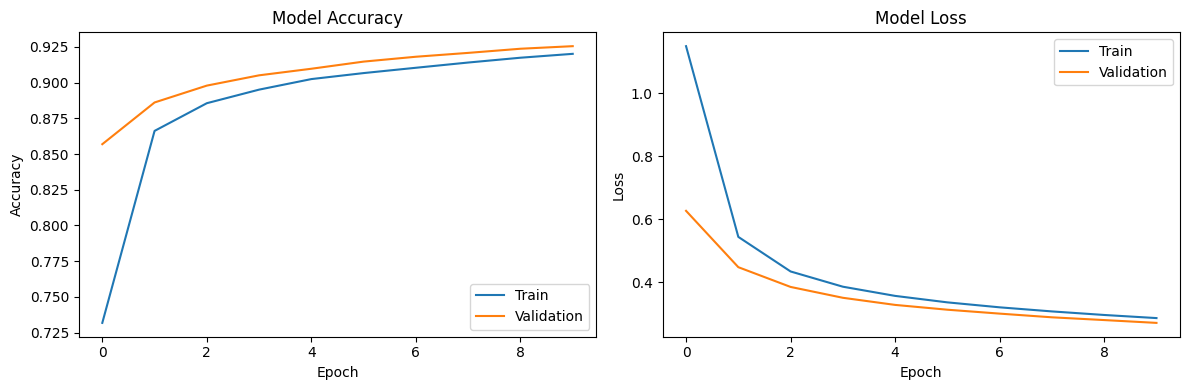

In [43]:
# Your Plot learning curves code here and in additional code cells as needed

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

#### Display the confusion matrix for your classifier *(10 pts)*

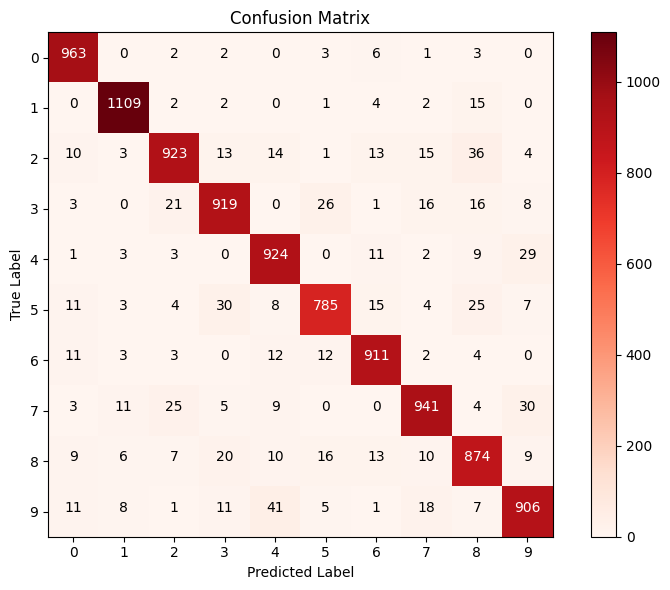

In [44]:
# Your confusion matrix code here and in additional code cells as needed
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Reds)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, range(num_classes))
plt.yticks(tick_marks, range(num_classes))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()

thresh = cm.max() / 2.
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.show()



#### Evaluate the model, identify accuracy, etc. *(10 pts)*

In [45]:
# Your Evaluate the model code here and in additional code cells as needed
loss, accuracy = model.evaluate(X_valid, y_valid, verbose=0)

print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

Validation Loss: 0.2710
Validation Accuracy: 0.9255


#### Discuss why the results are not as good. 

If you had more time what would you do to improve the results? *(10 pts)*

The model architecture may also need to be more complex to capture the underlying patterns in the data. Increasing the number of layers, the wide variety of gadgets in each layer, or using different superior architectures may enhance the performance.

The size or satisfaction of the training statistics may need to be increased for the mannequin to examine effectively. With a large and more varied training dataset, the mannequin should generalize better to unseen data.
The mannequin may additionally have overfitted the education data, which means it has been discovered to operate nicely on the coaching set but needs to generalize to new data. Regularization techniques such as dropout or weight regularization can be applied to limit overfitting and enhance generalization.

The hyperparameters of the model, such as learning rate, batch size, or a wide variety of epochs, might also no longer have been suitably optimized. Fine-tuning these hyperparameters using strategies like grid or random search should doubtlessly yield better results.

Inadequate or flawed preprocessing of the records can additionally impact model performance. Ensuring suited statistics scaling, handling lacking values, and using excellent characteristic engineering methods may lead to better results.

If the dataset has imbalanced classification distribution, where some classes have significantly fewer samples than others, the model can also fight to predict the minority classes precisely. Techniques such as oversampling, undersampling, or category weighting can assist tackle type imbalance issues.

 The chosen mannequin structure may not be well-suited for the particular hassle or dataset. Experimenting with distinct sorts of models or more excellent complicated architectures may want to yield higher results doubtlessly.

 Machine getting-to-know models can have a positive stage of randomness due to factors like random weight initialization or shuffling of the coaching data. Running the mannequin with the identical hyperparameters a couple of times ought to result in slightly one-of-a-kind results.

Inspecting these elements and iteratively testing them with unique methods to improve the model's performance is indispensable. Analyzing the challenges and barriers recognized from the effects can assist information further enhancements in the model and records pipeline. 

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_8 (Dense)             (None, 64)               

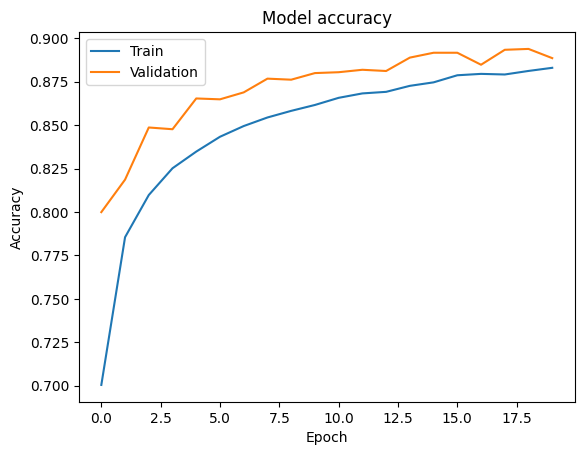

313/313 [==============================] - 1s 3ms/step
tf.Tensor(
[[896   2  12   8   5   1  68   0   8   0]
 [  1 987   0   8   1   0   2   0   1   0]
 [ 18   0 782   7  75   0 113   0   5   0]
 [ 31  10   9 878  40   0  26   0   6   0]
 [  3   1  42  22 860   0  69   0   3   0]
 [  0   0   0   0   0 975   1  15   1   8]
 [168   2  48  23 106   0 639   0  14   0]
 [  0   0   0   0   0  18   0 907   2  73]
 [  3   0   3   3   4   1   4   1 980   1]
 [  0   0   0   0   0   5   0  14   0 981]], shape=(10, 10), dtype=int32)
Validation accuracy: 0.8884999752044678


In [46]:
# (OPTIONAL) Additional code to demonstrate possible improvements to the model in Part 2.
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


num_classes = 10
input_shape = (28, 28, 1)

(X_train, y_train), (X_valid, y_valid) = fashion_mnist.load_data()

X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_valid = X_valid.reshape(-1, 28, 28, 1).astype('float32') / 255.0

y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)


datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.summary()

model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)


batch_size = 128
epochs = 20

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    steps_per_epoch=len(X_train) // batch_size,
    epochs=epochs,
    validation_data=(X_valid, y_valid)
)


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


y_pred = model.predict(X_valid)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_valid, axis=1)
confusion_matrix = tf.math.confusion_matrix(y_true_labels, y_pred_labels)
print(confusion_matrix)


_, accuracy = model.evaluate(X_valid, y_valid, verbose=0)
print('Validation accuracy:', accuracy)
